## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

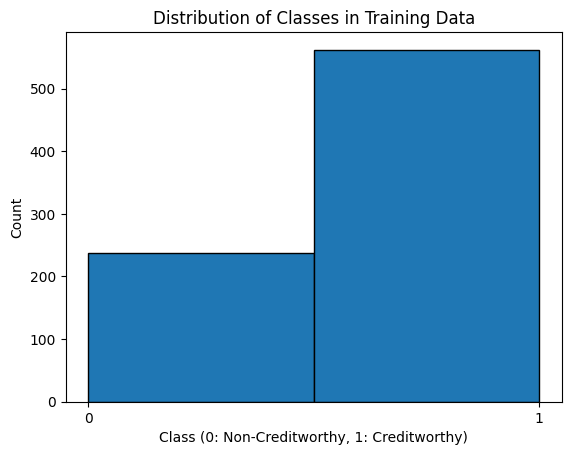

In [5]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [6]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [510]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.56
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

In [7]:
!pip install joblib

Улучшение метрики ROC-AUC для классификатора RandomForestClassifier с помощью кастомной функции поиска лучших параметров, использующей параллельные вычисления

In [8]:
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed

def custom_grid_search(X_train, y_train, X_test, y_test, param_grid):
    best_score = 0
    best_params = {}
    best_model = None
    # Все комбинации параметров
    all_params = list(itertools.product(*param_grid.values()))
    # Использование Parallel для распараллеливания
    results = Parallel(n_jobs=-1, verbose=2)(delayed(evaluate_model)(X_train, y_train, X_test, y_test, dict(zip(param_grid.keys(), params))) for params in all_params)
    # Обработка результатов
    for score, params, model in results:
        print(params, score)
        # Проверка и сохранение лучших параметров
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
    return best_params, best_score, best_model


In [9]:
# Функция оценки модели RandomForestClassifier
def evaluate_model(X_train, y_train, X_test, y_test, params):
    # Инициализация модели с текущими параметрами
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    # Предсказания вероятностей на тестовых данных
    y_pred = model.predict_proba(X_test)[:, 1]
    # y_pred = model.predict(X_test)
    # Оценка метрики ROC-AUC
    score = roc_auc_score(y_test, y_pred)
    return score, params, model

In [10]:
# Определение сетки параметров
param_grid = {
    # 'n_estimators': range(10,100,10),
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [5, 6, 7, ],
    # 'min_samples_leaf': [20, 30],
    # 'min_impurity_decrease': [0.5, 1.5, 3],
    # 'max_leaf_nodes': [40, 50, 60, 70, 80],
    'n_estimators': [15, 18, 20, 21, 30],
    # 'max_depth': [i for i in range(3, 50, 2)],
    # 'subsample':[0.85,0.9,0.95,1]
    
}
# Запуск подбора параметров
rf_best_params, rf_best_score, rf_best_model = custom_grid_search(X_train, y_train, X_test, y_test, param_grid)

# Лучшие параметры и лучший результат
print("Лучшие параметры:", rf_best_params)
print(f"ROC AUC: {rf_best_score:.2f}")
# > 4 минут

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s


{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 15} 0.779803646563815
{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 18} 0.7692262739597944
{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 20} 0.7791608228143994
{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 21} 0.7744857410004675
{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 30} 0.782667134174848
{'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 15} 0.779803646563815
{'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 18} 0.7692262739597944
{'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 20} 0.7791608228143994
{'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 21} 0.7744857410004675
{'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 30} 0.782667134174848
{'max_depth': 2, 'min_samples_split': 7, 'n_estimators': 15} 0.779803646563815
{'max_depth': 2, 'min_samples_split': 7, 'n_estimators': 18} 0.7692262739597944
{'max_depth': 2, 'min_samples_split': 7, 'n_e

[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished


In [11]:
# Лучшие параметры {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 21}
# лучшая оценка ROC AUC: 0.78
# Создание модели RandomForestClassifier с наилучшими параметрами
# Оценка на тестовом наборе
rf_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]
# rf_pred_proba = rf_best_model.predict(X_test)
# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
# Установка порога для метрик
threshold = 0.62  # Это можно изменить в зависимости от вашей задачи

# Преобразование вероятностей в бинарные метки
predicted_labels = (rf_pred_proba >= threshold).astype(int)  # 1, если вероятность >= порога, иначе 0

rf_accuracy = accuracy_score(y_test, predicted_labels)
rf_precision = precision_score(y_test, predicted_labels)
rf_recall = recall_score(y_test, predicted_labels)
print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.3f}")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")

Random Forest метрики:
ROC AUC: 0.808
Accuracy: 0.775
Precision: 0.850
Recall: 0.819


Улучшение метрики ROC-AUC для классификатора GradientBoostingClassifier с помощью кастомной функции поиска лучших параметров, использующей параллельные вычисления

In [12]:
# Функция оценки модели GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Изменение функции эвалюации модели для функции поиска параметров
def evaluate_model(X_train, y_train, X_test, y_test, params):
    # Инициализация модели с текущими параметрами
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    # Предсказания вероятностей на тестовых данных
    y_pred = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    # Оценка метрики ROC-AUC
    score = roc_auc_score(y_test, y_pred)
    return score, params, model


In [13]:
param_grid = {
    'n_estimators': [53, 54, 55, 56, 60, 65],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3, 5, 7],
    'subsample': [0.6, 0.65, 0.7],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5, 6],
}
best_params, best_score, best_model = custom_grid_search(X_train, y_train, X_test, y_test, param_grid)
print("Лучшие параметры:", best_params)
print("Лучший ROC AUC:", best_score)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 1689 out of 1728 | elapsed:   15.9s remaining:    0.3s


{'n_estimators': 53, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.6, 'min_samples_split': 2, 'min_samples_leaf': 3} 0.7883356708742404
{'n_estimators': 53, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.6, 'min_samples_split': 2, 'min_samples_leaf': 4} 0.7898550724637682
{'n_estimators': 53, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.6, 'min_samples_split': 2, 'min_samples_leaf': 5} 0.7852968676951846
{'n_estimators': 53, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.6, 'min_samples_split': 2, 'min_samples_leaf': 6} 0.786582515194016
{'n_estimators': 53, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.6, 'min_samples_split': 3, 'min_samples_leaf': 3} 0.7883356708742404
{'n_estimators': 53, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.6, 'min_samples_split': 3, 'min_samples_leaf': 4} 0.7898550724637682
{'n_estimators': 53, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.6, 'min_samples_split': 3, 'min_samples_leaf': 5} 0.7852968676

[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   17.1s finished


In [14]:
# Лучшие параметры: {'n_estimators': 54, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.6, 'min_samples_split': 2, 'min_samples_leaf': 5}
# Лучший ROC AUC: 0.8050490883590463
# Создание модели GradientBoostingClassifier с наилучшими параметрами
# Оценка на тестовом наборе
gb_pred_proba = best_model.predict_proba(X_test)[:, 1]
# rf_pred_proba = rf_best_model.predict(X_test)
# Расчет метрик для Random Forest
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
# Установка порога для метрик
threshold = 0.6  # Это можно изменить в зависимости от вашей задачи
# Преобразование вероятностей в бинарные метки
predicted_labels = (gb_pred_proba >= threshold).astype(int)  # 1, если вероятность >= порога, иначе 0
gb_accuracy = accuracy_score(y_test, predicted_labels)
gb_precision = precision_score(y_test, predicted_labels)
gb_recall = recall_score(y_test, predicted_labels)
print("Gradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.3f}")
print(f"Accuracy: {gb_accuracy:.3f}")
print(f"Precision: {gb_precision:.3f}")
print(f"Recall: {gb_recall:.3f}")

Gradient Boosting метрики:
ROC AUC: 0.805
Accuracy: 0.765
Precision: 0.837
Recall: 0.819


Улучшение метрики ROC-AUC для классификатора MultiLayerPerceptron с помощью кастомной функции поиска лучших параметров, использующей параллельные вычисления

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

# Функция оценки модели MLPClassifier
def evaluate_model(X_train, y_train, X_test, y_test, params):
    # Удаляем max_iter из params и устанавливаем его отдельно
    max_iter = params.pop('max_iter', 500)  # Используем 500 как значение по умолчанию, если max_iter не указан
    # Инициализация модели с текущими параметрами
    model = MLPClassifier(**params, random_state=42, max_iter=max_iter)
    model.fit(X_train, y_train)
    # Предсказания вероятностей на тестовых данных
    y_pred = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    # Оценка метрики ROC-AUC
    score = roc_auc_score(y_test, y_pred)
    return score, params, model

In [17]:
# Определение параметров для MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(190,), (200, 10)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0005, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    # 'max_iter': [200, 500],  # Можно изменить количество итераций
    'early_stopping': [True],
}
# Поиск лучших параметров
best_params, best_score, best_model = custom_grid_search(X_train, y_train, X_test, y_test, param_grid)
print("Лучшие параметры:", best_params)
print("Лучший ROC AUC:", best_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  69 out of 108 | elapsed:    1.8s remaining:    1.0s


{'hidden_layer_sizes': (190,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005, 'learning_rate': 'constant', 'early_stopping': True} 0.47627395979429643
{'hidden_layer_sizes': (190,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005, 'learning_rate': 'adaptive', 'early_stopping': True} 0.47627395979429643
{'hidden_layer_sizes': (190,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001, 'learning_rate': 'constant', 'early_stopping': True} 0.47627395979429643
{'hidden_layer_sizes': (190,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001, 'learning_rate': 'adaptive', 'early_stopping': True} 0.47627395979429643
{'hidden_layer_sizes': (190,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01, 'learning_rate': 'constant', 'early_stopping': True} 0.5689574567554933
{'hidden_layer_sizes': (190,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01, 'learning_rate': 'adaptive', 'early_stopping': True} 0.5689574567554933
{'hidden_layer_sizes': (190,), 'activation

[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   23.4s finished


In [18]:
# Лучшие параметры: {'hidden_layer_sizes': (190,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.001, 'learning_rate': 'constant', 'early_stopping': True}
# Лучший ROC AUC: 0.8041140719962598
# Оценка на тестовом наборе
mlp_pred_proba = best_model.predict_proba(X_test)[:, 1]
# Расчет метрик для MLPClassifier
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)

# Установка порога для метрик
threshold = 0.65 

# Преобразование вероятностей в бинарные метки
predicted_labels = (mlp_pred_proba >= threshold).astype(int)  # 1, если вероятность >= порога, иначе 0
mlp_accuracy = accuracy_score(y_test, predicted_labels)
mlp_precision = precision_score(y_test, predicted_labels)
mlp_recall = recall_score(y_test, predicted_labels)

print("MLP метрики:")
print(f"ROC AUC: {mlp_roc_auc:.3f}")
print(f"Accuracy: {mlp_accuracy:.3f}")
print(f"Precision: {mlp_precision:.3f}")
print(f"Recall: {mlp_recall:.3f}")


MLP метрики:
ROC AUC: 0.804
Accuracy: 0.780
Precision: 0.822
Recall: 0.870
